# PROYECTO FINAL MODULO 5: ENTRENAMIENTO DE MODELO DE ML PARA DETERMINAR SI UN PACIENTE SUFRE DE ANEMIA

ROSITA TORRES

# IMPORTAR LIBRERIAS

In [222]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.compose
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.model_selection import cross_val_score

In [99]:
!pip install pyjanitor
import janitor
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [212]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


# FUENTE : [DATOS ABIERTOS](https://www.datosabiertos.gob.pe/dataset/morbilidad-anemia)

In [100]:
ls /content/drive/MyDrive/Notebooks_Colaborate/MODULO05/TRABAJO_FINAL/DATASET

DD_TB_ANEMIA.xlsx  TB_ANEMIA.csv  TB_UBIGEOS.csv


In [101]:
DATASET_PATH = '/content/drive/MyDrive/Notebooks_Colaborate/MODULO05/TRABAJO_FINAL/DATASET/TB_ANEMIA.csv'
df_anemia = pd.read_csv(DATASET_PATH,sep = ";")
df_anemia.head(10)

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
0,40971314,2,A,M,NaN,20230522,D649,D,6203
1,39270343,4,A,M,1128.0,20211122,D509,D,10836
2,39270343,4,A,M,1128.0,20211129,D509,D,10836
3,39155787,3,A,F,1128.0,20210527,D509,D,10836
4,36178995,2,A,F,1299.0,20210215,D509,D,6079
5,38926264,4,A,M,1506.0,20211113,D509,D,7475
6,39141175,1,A,M,1128.0,20210220,D509,D,6856
7,40229751,2,A,M,1278.0,20221120,D509,D,4416
8,39603123,1,A,M,1278.0,20210428,D509,D,4416
9,39105165,1,A,M,1128.0,20210106,D509,D,10836


In [102]:
DATASET_PATH_UBIGEO = '/content/drive/MyDrive/Notebooks_Colaborate/MODULO05/TRABAJO_FINAL/DATASET/TB_UBIGEOS.csv'
df_ubigeos = pd.read_csv(DATASET_PATH_UBIGEO,sep = ";")
df_ubigeos.head(10)

,id_ubigeo,ubigeo_reniec,ubigeo_inei,departamento_inei,departamento,provincia_inei,provincia,distrito,region,macroregion_inei,macroregion_minsa,iso_3166_2,fips,superficie,altitud,latitud,longitud,Frontera
0,1,10101.0,10101,1,AMAZONAS,101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,154.0,2338.0,-6.2294,-77.8728,NO
1,2,10102.0,10102,1,AMAZONAS,101,CHACHAPOYAS,ASUNCION,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,26.0,2823.0,-6.0325,-77.7108,NO
2,3,10103.0,10103,1,AMAZONAS,101,CHACHAPOYAS,BALSAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,357.0,859.0,-6.8358,-78.0197,NO
3,4,10104.0,10104,1,AMAZONAS,101,CHACHAPOYAS,CHETO,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,57.0,2143.0,-6.2556,-77.7008,NO
4,5,10105.0,10105,1,AMAZONAS,101,CHACHAPOYAS,CHILIQUIN,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,143.0,2677.0,-6.0783,-77.7375,NO
5,6,10106.0,10106,1,AMAZONAS,101,CHACHAPOYAS,CHUQUIBAMBA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,279.0,2803.0,-6.9350,-77.8542,NO
6,7,10107.0,10107,1,AMAZONAS,101,CHACHAPOYAS,GRANADA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,181.0,3041.0,-6.1064,-77.6286,NO
7,8,10108.0,10108,1,AMAZONAS,101,CHACHAPOYAS,HUANCAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,49.0,2591.0,-6.1736,-77.8644,NO
8,9,10109.0,10109,1,AMAZONAS,101,CHACHAPOYAS,LA JALCA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,380.0,2869.0,-6.4847,-77.8150,NO
9,10,10110.0,10110,1,AMAZONAS,101,CHACHAPOYAS,LEIMEBAMBA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,373.0,2226.0,-6.7075,-77.8039,NO


# EDA

In [138]:
df_anemia.shape

(1327924, 11)

In [139]:
df_anemia.dtypes

,0
id_persona,int64
Edad,int64
Tipo_edad,object
Sexo,object
id_ubigeo,float64
Fecha_atencion,int64
Diagnostico,object
Tipo_Dx,object
id_eess,int64
edad_total,float64


In [140]:
df_anemia.dtypes.value_counts()

,count
object,5
int64,4
float64,2


TRATAMIENTO DE NULOS

In [141]:
df_anemia.isnull().sum().sum()

10817

In [142]:
df_anemia_clean = (
    df_anemia
    .dropna()
)
df_anemia_clean.shape

(1317107, 11)

TRATAMIENTO DE  DUPLICADOS




In [143]:
df_anemia_clean.duplicated().sum()

19287

In [144]:
df_anemia_clean = df_anemia_clean.copy()

df_anemia_clean.drop_duplicates(keep='first', inplace=True) # Remove duplicates in place
df_anemia_clean.shape

(1297820, 11)

In [145]:
df_anemia_clean.duplicated().sum()

0

In [146]:
df_ubigeos.shape

(1893, 18)

In [147]:
df_ubigeos.isnull().sum().sum()

81

In [148]:
df_ubigeos_clean = (
    df_ubigeos
    .dropna()
)
df_ubigeos_clean.shape

(1870, 18)

In [149]:
df_ubigeos_clean.duplicated().sum()

0

nos quedamos con el id ubigeo y departamento

In [150]:
df_ubigeos_clean = df_ubigeos_clean[['id_ubigeo','departamento']].copy()
df_ubigeos_clean.head()

,id_ubigeo,departamento
0,1,AMAZONAS
1,2,AMAZONAS
2,3,AMAZONAS
3,4,AMAZONAS
4,5,AMAZONAS


# ANALISIS DE DATOS

Eliminar la columna ID

In [151]:
df_anemia_clean.drop('id_persona',axis=1,inplace=True)

In [152]:
df_anemia_clean['Tipo_edad'].value_counts()

,count
Tipo_edad,
A,920953
M,375857
D,1010


convertimos la edad a años

In [154]:
df_anemia_clean[ 'edad_total'] = df_anemia.apply(
lambda row: row[ 'Edad'] / 12 if row['Tipo_edad'] == 'M' else
 (row['Edad'] / 365 if row[ 'Tipo_edad'] == 'D' else row['Edad']),axis=1)
df_anemia_clean.head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,periodo
1,4,A,M,1128.0,20211122,D509,D,10836,4.0,202111
2,4,A,M,1128.0,20211129,D509,D,10836,4.0,202111
3,3,A,F,1128.0,20210527,D509,D,10836,3.0,202105
4,2,A,F,1299.0,20210215,D509,D,6079,2.0,202102
5,4,A,M,1506.0,20211113,D509,D,7475,4.0,202111
6,1,A,M,1128.0,20210220,D509,D,6856,1.0,202102
7,2,A,M,1278.0,20221120,D509,D,4416,2.0,202211
8,1,A,M,1278.0,20210428,D509,D,4416,1.0,202104
9,1,A,M,1128.0,20210106,D509,D,10836,1.0,202101
10,1,A,M,1128.0,20210107,D509,D,10836,1.0,202101


In [155]:
df_anemia_clean[df_anemia_clean['Tipo_edad'] == 'D'].head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,periodo
1775,1,D,F,1477.0,20210106,D509,D,125,0.002740,202101
4616,1,D,F,1128.0,20210531,D509,D,10836,0.002740,202105
5149,20,D,M,994.0,20210608,D539,D,3364,0.054795,202106
6450,6,D,F,1464.0,20210213,D509,D,212,0.016438,202102
6694,1,D,M,774.0,20220225,D509,D,2435,0.002740,202202
6740,24,D,F,1866.0,20210423,D509,D,5513,0.065753,202104
7054,1,D,M,1460.0,20210805,D509,D,16,0.002740,202108
7144,9,D,F,1274.0,20211204,D509,D,4432,0.024658,202112
7177,17,D,F,1248.0,20220322,D509,D,4327,0.046575,202203
7248,16,D,M,1484.0,20210308,D500,D,146,0.043836,202103


analizamos ID UBIGEO

In [156]:
df_anemia_clean['id_ubigeo'].value_counts()

,count
id_ubigeo,
1312.0,33487
1283.0,20689
1290.0,13846
1863.0,13049
1323.0,13029
...,...
1842.0,1
320.0,1
1841.0,1


NOS QUEDAREMOS SOLO CON EL DEPARTAMENTO DESDE ID BUGEO

In [157]:
df_anemia_clean = df_anemia_clean.merge(df_ubigeos_clean,on='id_ubigeo',how='left')
df_anemia_clean.head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,periodo,departamento
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,202111,JUNIN
1,4,A,M,1128.0,20211129,D509,D,10836,4.0,202111,JUNIN
2,3,A,F,1128.0,20210527,D509,D,10836,3.0,202105,JUNIN
3,2,A,F,1299.0,20210215,D509,D,6079,2.0,202102,LIMA
4,4,A,M,1506.0,20211113,D509,D,7475,4.0,202111,MADRE DE DIOS
5,1,A,M,1128.0,20210220,D509,D,6856,1.0,202102,JUNIN
6,2,A,M,1278.0,20221120,D509,D,4416,2.0,202211,LAMBAYEQUE
7,1,A,M,1278.0,20210428,D509,D,4416,1.0,202104,LAMBAYEQUE
8,1,A,M,1128.0,20210106,D509,D,10836,1.0,202101,JUNIN
9,1,A,M,1128.0,20210107,D509,D,10836,1.0,202101,JUNIN


el campo diagnostico

In [158]:
df_anemia_clean['anemia'] = np.where(df_anemia_clean['Diagnostico'].str.startswith(('D50','D53','D64')),1,0)
df_anemia_clean.head(3)


,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,periodo,departamento,anemia
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,202111,JUNIN,1
1,4,A,M,1128.0,20211129,D509,D,10836,4.0,202111,JUNIN,1
2,3,A,F,1128.0,20210527,D509,D,10836,3.0,202105,JUNIN,1


In [159]:
df_anemia_clean['periodo'] = df_anemia_clean['Fecha_atencion'].astype(str).str[0:6]
df_anemia_clean.head(1)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,periodo,departamento,anemia
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,202111,JUNIN,1


In [162]:
df_anemia_clean['anio'] = df_anemia_clean['Fecha_atencion'].astype(str).str[0:4]
df_anemia_clean.head(1)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,periodo,departamento,anemia,anio
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,202111,JUNIN,1,2021


In [163]:
df_anemia_clean['anio'].value_counts()

,count
anio,
2022,383384
2023,379109
2021,365257
2024,170070


In [164]:
df_anemia_processed = df_anemia_clean[['anio','Sexo','departamento','edad_total','anemia']].copy()
df_anemia_processed.rename(columns={'Sexo':'sexo','departamento':'dpto','edad_total':'edad_anios','anemia':'anemia','anio':'periodo'},inplace=True)
df_anemia_processed.head()

,periodo,sexo,dpto,edad_anios,anemia
0,2021,M,JUNIN,4.0,1
1,2021,M,JUNIN,4.0,1
2,2021,F,JUNIN,3.0,1
3,2021,F,LIMA,2.0,1
4,2021,M,MADRE DE DIOS,4.0,1


# CODIFICACIÓN DE VARIABLES CATEGORICAS

In [167]:
df_anemia_processed.dtypes

,0
periodo,object
sexo,object
dpto,object
edad_anios,float64
anemia,int64


In [166]:
categorical_columns = df_anemia_processed.select_dtypes(object).columns
categorical_columns

Index(['periodo', 'sexo', 'dpto'], dtype='object')

In [169]:
for cc in categorical_columns:
  print("*"*50)
  print(df_anemia_processed[cc].value_counts())

**************************************************
periodo
2022    383384
2023    379109
2021    365257
2024    170070
Name: count, dtype: int64
**************************************************
sexo
M    684186
F    613634
Name: count, dtype: int64
**************************************************
dpto
LIMA             261381
LORETO           135915
PIURA             75907
LAMBAYEQUE        75647
LA LIBERTAD       71621
CUSCO             70771
ANCASH            69953
CAJAMARCA         59662
UCAYALI           57220
JUNIN             44827
AYACUCHO          41822
AREQUIPA          40045
PUNO              34769
SAN MARTIN        33645
HUANCAVELICA      32284
AMAZONAS          32186
ICA               29302
APURIMAC          26869
HUANUCO           26248
CALLAO            20849
PASCO             17204
MADRE DE DIOS     14438
TUMBES            10175
TACNA              6141
MOQUEGUA           4591
Name: count, dtype: int64


In [195]:
df_anemia_processed['anemia'].value_counts()

,count
anemia,
1,1294978
0,2842


In [182]:
ordinal_cols = ['periodo']
onehot_cols = ['sexo','dpto']
print(ordinal_cols,onehot_cols)

['periodo'] ['sexo', 'dpto']


In [183]:
transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(),ordinal_cols),
    (sklearn.preprocessing.OneHotEncoder(handle_unknown='ignore', sparse_output=False),onehot_cols),
    remainder='passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['periodo']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['sexo', 'dpto'])])

aplicamos el transformer a variables categoricas

In [184]:
data_transformed_df = (
    pd.DataFrame(
        transformer.fit_transform(df_anemia_processed),
        columns = transformer.get_feature_names_out(),
        index=df_anemia_processed.index
    )
)

data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("ordinalencoder__", "").replace("onehotencoder__", "").replace("remainder__", "")
)

data_transformed_df

,periodo,sexo_F,sexo_M,dpto_AMAZONAS,dpto_ANCASH,dpto_APURIMAC,dpto_AREQUIPA,dpto_AYACUCHO,dpto_CAJAMARCA,dpto_CALLAO,...,dpto_PASCO,dpto_PIURA,dpto_PUNO,dpto_SAN MARTIN,dpto_TACNA,dpto_TUMBES,dpto_UCAYALI,dpto_nan,edad_anios,anemia
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297815,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0
1297816,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0
1297817,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1297818,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# CORRELACION DE VARIABLES




In [187]:
# Calcular la matriz de correlación
corr_matrix = data_transformed_df.corr()

# Extraer la correlación con 'anemia'
corr_charges = corr_matrix['anemia']

# Filtrar valores mayores a 0.004 y ordenarlos de mayor a menor
filtered_corr = corr_charges[corr_charges > 0.004].sort_values(ascending=False)

# Mostrar el resultado
print(filtered_corr)


anemia             1.000000
dpto_ANCASH        0.006802
dpto_LAMBAYEQUE    0.006449
dpto_CUSCO         0.006314
dpto_UCAYALI       0.004200
dpto_JUNIN         0.004077
Name: anemia, dtype: float64


<Axes: >

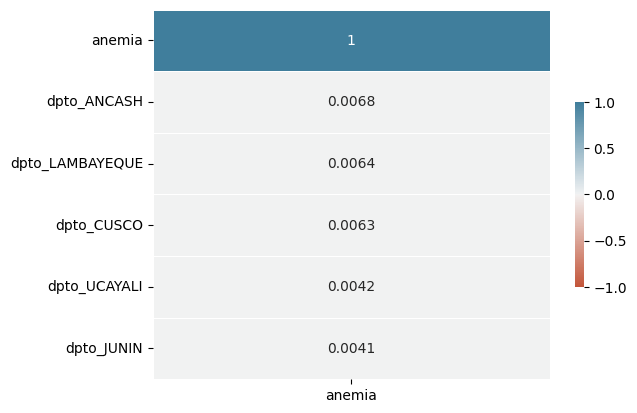

In [188]:
sns.heatmap(
    data=filtered_corr.sort_values(ascending=False).to_frame(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

# ESCALABILIDAD DE CAMPOS

In [191]:
scaler = MinMaxScaler()
df_data_preprocessing_scaled = scaler.fit_transform(data_transformed_df)
df_data_preprocessing_scaled = pd.DataFrame(df_data_preprocessing_scaled)
df_data_preprocessing_scaled.columns = data_transformed_df.columns
df_data_preprocessing_scaled

,periodo,sexo_F,sexo_M,dpto_AMAZONAS,dpto_ANCASH,dpto_APURIMAC,dpto_AREQUIPA,dpto_AYACUCHO,dpto_CAJAMARCA,dpto_CALLAO,...,dpto_PASCO,dpto_PIURA,dpto_PUNO,dpto_SAN MARTIN,dpto_TACNA,dpto_TUMBES,dpto_UCAYALI,dpto_nan,edad_anios,anemia
0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363478,1.0
1,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363478,1.0
2,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272546,1.0
3,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181614,1.0
4,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363478,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297815,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.545341,1.0
1297816,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.818137,1.0
1297817,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090683,1.0
1297818,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090683,1.0


# APLICACION DE MODELOS
1. LOGISTICA

In [192]:
X = df_data_preprocessing_scaled.drop('anemia',axis=1)
y = df_data_preprocessing_scaled['anemia'].values

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

model = LogisticRegression()
result = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f'accuracy : {metrics.accuracy_score(y_test,y_pred)}')

accuracy : 0.9977243891037791


MATRIZ DE CONFUSION

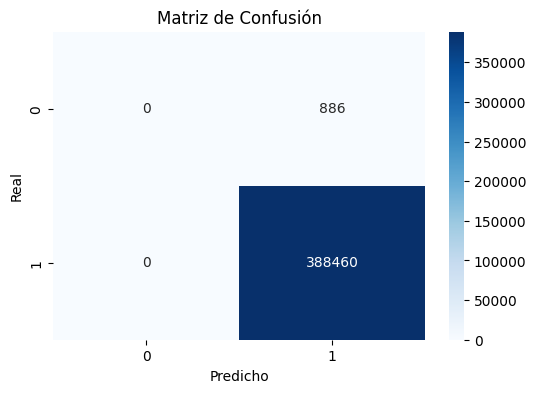

In [194]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# APLICACION DE MODELOS

2. ARBOL DE DECISCION


In [197]:
X = data_transformed_df.drop(['anemia'],axis=1)
y = data_transformed_df['anemia']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)
tree = DecisionTreeClassifier(max_depth=7,random_state=0)

tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_accuracy_tree = accuracy_score(y_train,y_train_pred)
test_accuray_tree =  accuracy_score(y_test,y_test_pred)

print(f'El accuracy en train es  : {train_accuracy_tree}')
print(f'El accuracy en test es  : {test_accuray_tree}')

El accuracy en train es  : 0.9978290517945477
El accuracy en test es  : 0.9977346627421368


<ipython-input-207-8a04ddd61675>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns,y=importances,palette = 'bright', saturation = 2.0, edgecolor ='black', linewidth = 2)


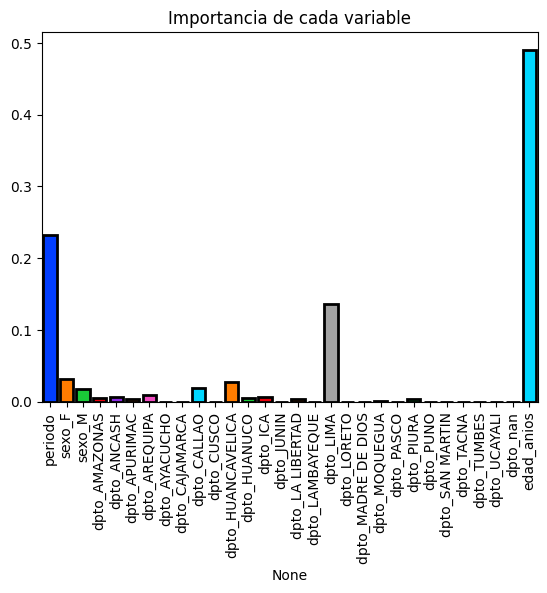

In [207]:
importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns,y=importances,palette = 'bright', saturation = 2.0, edgecolor ='black', linewidth = 2)
plt.title('Importancia de cada variable')
plt.xticks(rotation=90)
plt.show()

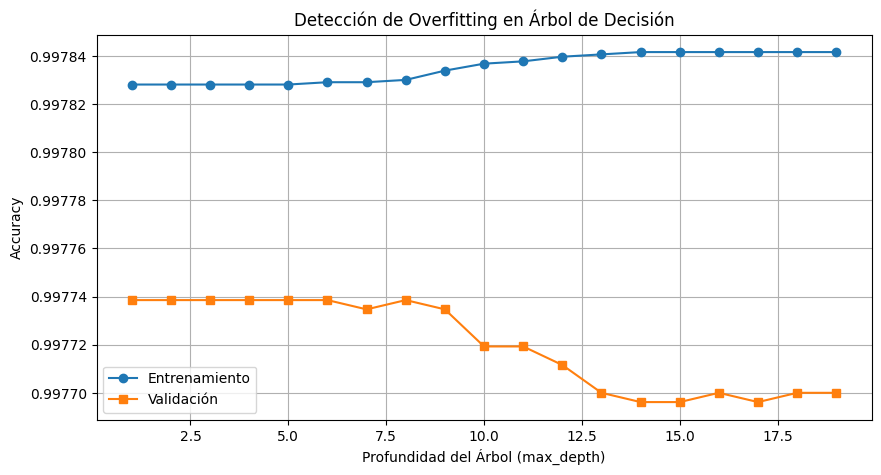

In [205]:
# Datos (usamos X, y de tu dataset)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_scores = []
val_scores = []
max_depths = range(1,20)  # Profundidades de 1 a 20

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Evaluamos en los conjuntos de entrenamiento y validación
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))

    train_scores.append(train_acc)
    val_scores.append(val_acc)

# Graficamos las curvas de accuracy
plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_scores, label="Entrenamiento", marker='o')
plt.plot(max_depths, val_scores, label="Validación", marker='s')
plt.xlabel("Profundidad del Árbol (max_depth)")
plt.ylabel("Accuracy")
plt.title("Detección de Overfitting en Árbol de Decisión")
plt.legend()
plt.grid(True)
plt.show()

# APLICACION DE MODELOS  
3. RANDOM FOREST

In [208]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [219]:
model = RandomForestClassifier(
    n_estimators=100,  # Número de árboles en el bosque
    max_depth=10,  # Limita la profundidad de cada árbol
    min_samples_split=5,  # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,  # Mínimo de muestras en las hojas
    max_features='sqrt',  # Seleccionar √(n_features) en cada división
    random_state=42  # Para reproducibilidad
)

In [220]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 1.00
Test Accuracy: 1.00


In [223]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'🔹 Cross-Validation Accuracy: {cv_scores.mean():.2f}')

🔹 Cross-Validation Accuracy: 1.00


In [ ]:

# Definir los rangos de hiperparámetros
param_space = {
    'n_estimators': Integer(50, 100),
    'max_depth': Integer(10, 20),
    'min_samples_split': Integer(5,10),
    'min_samples_leaf': Integer(2, 4),
    'max_features': Categorical(['sqrt', 'log2'])
}

# Instancia del modelo
rf = RandomForestClassifier(random_state=42)

# Optimización bayesiana
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space,
                             n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Entrenar con los datos
bayes_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores parámetros:", bayes_search.best_params_)
print("Mejor puntuación:", bayes_search.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
